In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('athlete_events.csv')
region_df = pd.read_csv('noc_regions.csv')

In [5]:
df.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
174057,87442,Immaculate Nwaogu,F,21.0,NaN,NaN,Nigeria,NGR,1992 Summer,1992,Summer,Barcelona,Handball,Handball Women's Handball,NaN
80432,40825,Andrej Glucks,M,24.0,166.0,70.0,Croatia,CRO,2000 Summer,2000,Summer,Sydney,Canoeing,"Canoeing Men's Kayak Singles, Slalom",NaN
165001,82860,Bohumil Mudk,M,26.0,170.0,64.0,Czechoslovakia,TCH,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Men's Team All-Around,NaN
229567,115266,Glenda Joy Stirling (-Biddle),F,16.0,168.0,65.0,New Zealand,NZL,1968 Summer,1968,Summer,Mexico City,Swimming,Swimming Women's 200 metres Backstroke,NaN
26084,13601,Dimitri Borovik,M,32.0,178.0,72.0,Estonia,EST,2006 Winter,2006,Winter,Torino,Biathlon,Biathlon Men's 10 kilometres Sprint,NaN


In [7]:
df.shape

(271116, 15)

In [13]:
df= df[df['Season']=='Summer']

In [15]:
df.shape

(222552, 15)

In [17]:
df.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
11505,6284,Kazm Ayvaz,M,26.0,173.0,70.0,Turkey,TUR,1964 Summer,1964,Summer,Tokyo,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",Gold
202834,101890,Godfried Leonard Roll,M,24.0,190.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Rowing,Rowing Men's Coxless Pairs,NaN
245181,122773,Frank Conway Turner,M,29.0,NaN,NaN,Great Britain,GBR,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Horizontal Bar,NaN
25844,13488,Francisco Alberto Borgonovo,M,21.0,178.0,NaN,Argentina,ARG,1924 Summer,1924,Summer,Paris,Rowing,Rowing Men's Coxed Eights,NaN
262784,131487,"Mervyn Thomas ""Merv"" Wood",M,31.0,NaN,NaN,Australia,AUS,1948 Summer,1948,Summer,London,Rowing,Rowing Men's Single Sculls,Gold


In [19]:
region_df.tail()

,NOC,region,notes
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN
229,ZIM,Zimbabwe,NaN


In [25]:
df=df.merge(region_df,on='NOC',how='left')

In [33]:
df['region'].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia',
       'Ivory Coast', 'Kenya', 'Ben

In [37]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [39]:
df.duplicated().sum()

1385

In [45]:
df.drop_duplicates(inplace=True)

In [47]:
df.duplicated().sum()

0

In [53]:
df['Medal'].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [57]:
pd.get_dummies(df['Medal']).astype(int)

,Bronze,Gold,Silver
0,0,0,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,0
...,...,...,...
222547,0,0,0
222548,0,0,0
222549,0,0,0
222550,0,0,0


In [61]:
me = pd.get_dummies(df['Medal']).astype(int)

In [75]:
df =  pd.concat([df,me],axis = 1)

In [79]:
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold', ascending=False)

,Gold,Silver,Bronze
NOC,,,
USA,2472,1333,1197
URS,832,635,596
GBR,635,729,620
GER,592,538,649
ITA,518,474,454
...,...,...,...
AHO,0,1,0
LBR,0,0,0
LCA,0,0,0


In [83]:
df[(df['NOC']=='IND')& (df['Medal']=='Gold')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
4186,2699,Shaukat Ali,M,30.0,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4190,2703,Syed Mushtaq Ali,M,22.0,165.0,61.0,India,IND,1964 Summer,1964,Summer,Tokyo,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4460,2864,Richard James Allen,M,25.0,172.0,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4461,2864,Richard James Allen,M,30.0,172.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4462,2864,Richard James Allen,M,34.0,172.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191759,117232,Dung Dung Sylvanus,M,31.0,160.0,62.0,India,IND,1980 Summer,1980,Summer,Moskva,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
193964,118553,Carlyle Carrol Tapsell,M,23.0,182.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
193965,118553,Carlyle Carrol Tapsell,M,27.0,182.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
205949,125560,"Max ""Maxie"" Vaz",M,NaN,NaN,NaN,India,IND,1948 Summer,1948,Summer,London,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0


In [87]:
medaltally = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [97]:
medaltally.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold', ascending=False)

,Gold,Silver,Bronze
region,,,
USA,1035,802,708
Russia,592,498,487
Germany,444,457,491
UK,278,317,300
France,234,256,287
...,...,...,...
Lesotho,0,0,0
Albania,0,0,0
Libya,0,0,0


In [95]:
medaltally[medaltally['NOC']=='IND'].groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold', ascending=False)

,Gold,Silver,Bronze
region,,,
India,9,7,12


In [101]:
medaltally.loc[:, 'Total'] = medaltally['Gold'] + medaltally['Silver'] + medaltally['Bronze']

In [103]:
medaltally.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver,Total
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,...,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,...,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,...,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,...,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0,1
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,...,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0,0


In [113]:
medaltally_regionwise = medaltally[['region', 'Gold', 'Silver', 'Bronze', 'Total']]

In [115]:
medaltally_regionwise

,region,Gold,Silver,Bronze,Total
0,China,0,0,0,0
1,China,0,0,0,0
2,Denmark,0,0,0,0
3,Denmark,1,0,0,1
4,Netherlands,0,0,0,0
...,...,...,...,...,...
222528,Russia,0,1,0,1
222530,Russia,0,0,1,1
222536,Poland,0,0,0,0
222537,Poland,0,0,0,0


In [121]:
medaltally_regionwise = medaltally_regionwise.groupby('region').sum()[['Gold','Silver','Bronze','Total']].sort_values('Gold', ascending=False)

In [123]:
medaltally_regionwise


,Gold,Silver,Bronze,Total
region,,,,
USA,1035,802,708,2545
Russia,592,498,487,1577
Germany,444,457,491,1392
UK,278,317,300,895
France,234,256,287,777
...,...,...,...,...
Lesotho,0,0,0,0
Albania,0,0,0,0
Libya,0,0,0,0


In [125]:
years = df['Year'].unique().tolist()

In [127]:
years


[1992,
 2012,
 1920,
 1900,
 1932,
 1952,
 2000,
 1996,
 1912,
 1924,
 1948,
 2008,
 2016,
 2004,
 1984,
 1968,
 1972,
 1988,
 1936,
 1956,
 1960,
 1928,
 1976,
 1980,
 1964,
 1906,
 1904,
 1908,
 1896]

In [129]:
years.sort()

In [139]:
years.insert(0,'Over all')

In [135]:
years

['Over all',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [192]:
country = df['region'].dropna().unique().tolist()

In [194]:
country.sort()

In [197]:
country

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guin

In [188]:
country.insert(0,'Over all')

In [190]:
country

['Over all',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gu

In [205]:
medaltally_regionwise.reset_index(inplace=True)

In [207]:
medaltally_regionwise

,region,Gold,Silver,Bronze,Total
0,USA,1035,802,708,2545
1,Russia,592,498,487,1577
2,Germany,444,457,491,1392
3,UK,278,317,300,895
4,France,234,256,287,777
...,...,...,...,...,...
200,Lesotho,0,0,0,0
201,Albania,0,0,0,0
202,Libya,0,0,0,0
203,Liechtenstein,0,0,0,0


In [291]:
def fetch_medal_tally(year,country):
    medal_df = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])
    
    flag = 0
    if year == 'Overall' and country == 'Overall' :
        tempdf = medal_df
        
    if year == 'Overall' and country != 'Overall' :
        flag = 1
        tempdf = medal_df[medal_df['region'] == country]
        
    if year != 'Overall' and country == 'Overall' :
        tempdf = medal_df[medal_df['Year'] == int(year)]
        
    if year != 'Overall' and country != 'Overall' :
        tempdf = medal_df[(medal_df['Year'] == year) & (medal_df['region'] == country)]

    if flag ==1 :
        x = tempdf.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Year')
        x.loc[:, 'Total'] = x['Gold'] + x['Silver'] + x['Bronze']
        x.reset_index(inplace=True)
    else :
        x = tempdf.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold', ascending=False)
        x.loc[:, 'Total'] = x['Gold'] + x['Silver'] + x['Bronze']
        x.reset_index(inplace=True)

    print(x)


In [213]:
medal_df = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [235]:
medal_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222528,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver,Russia,NaN,0,0,1
222530,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze,Russia,NaN,1,0,0
222536,135556,Bogusaw Stanisaw Zychowicz,M,19.0,189.0,80.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 100 metres Butterfly,NaN,Poland,NaN,0,0,0
222537,135556,Bogusaw Stanisaw Zychowicz,M,19.0,189.0,80.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 200 metres Butterfly,NaN,Poland,NaN,0,0,0


In [ ]:
medal_df[medal_df['region'] == 'country']

In [271]:
tempdf = medal_df[(medal_df['Year'] == 2016) & (medal_df['region'] == 'USA')]

In [273]:
tempdf

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
213,149,Mara Katherine Abbott,F,30.0,163.0,52.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Cycling,"Cycling Women's Road Race, Individual",NaN,USA,NaN,0,0,0
1238,811,Natalie Cammile Adams (-Brannan),F,24.0,173.0,65.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Butterfly,NaN,USA,NaN,0,0,0
1296,837,Rachael Alexis Adams,F,26.0,188.0,81.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Volleyball,Volleyball Women's Volleyball,Bronze,USA,NaN,1,0,0
1486,961,"Bradley Don ""Brad"" Adkins",M,22.0,188.0,80.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's High Jump,NaN,USA,NaN,0,0,0
1595,1017,Nathan Ghar-Jun Adrian,M,27.0,198.0,100.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 50 metres Freestyle,Bronze,USA,NaN,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214420,130667,Serena Jamika Williams,F,34.0,175.0,70.0,United States-1,USA,2016 Summer,2016,Summer,Rio de Janeiro,Tennis,Tennis Women's Doubles,NaN,USA,NaN,0,0,0
216038,131614,Kelsi Worrell,F,22.0,180.0,75.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 100 metres Butterfly,NaN,USA,NaN,0,0,0
216310,131789,"Yue ""Jennifer"" Wu",F,26.0,160.0,51.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Table Tennis,Table Tennis Women's Singles,NaN,USA,NaN,0,0,0
216311,131789,"Yue ""Jennifer"" Wu",F,26.0,160.0,51.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Table Tennis,Table Tennis Women's Team,NaN,USA,NaN,0,0,0


In [275]:
x = tempdf.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold', ascending=False)
x.loc[:, 'Total'] = x['Gold'] + x['Silver'] + x['Bronze']
x.reset_index(inplace=True)

print(x)


  region  Gold  Silver  Bronze  Total
0    USA    46      37      38    121


In [293]:
fetch_medal_tally(year = 'Overall',country = 'India')

    Year  Gold  Silver  Bronze  Total
0   1900     0       2       0      2
1   1920     0       0       0      0
2   1924     0       0       0      0
3   1928     1       0       0      1
4   1932     1       0       0      1
5   1936     1       0       0      1
6   1948     1       0       0      1
7   1952     1       0       1      2
8   1956     1       0       0      1
9   1960     0       1       0      1
10  1964     1       0       0      1
11  1968     0       0       1      1
12  1972     0       0       1      1
13  1976     0       0       0      0
14  1980     1       0       0      1
15  1984     0       0       0      0
16  1988     0       0       0      0
17  1992     0       0       0      0
18  1996     0       0       1      1
19  2000     0       0       1      1
20  2004     0       1       0      1
21  2008     1       0       2      3
22  2012     0       2       4      6
23  2016     0       1       1      2


# no of editions
# no of cities
# no of events/sports
# no of athletes
# participating nations



In [296]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,0,0,0
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,0,0,0
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0


In [316]:
Editions = df['Year'].unique().shape[0] - 1
Cities = df['City'].unique().shape[0]
sports= df['Sport'].unique().shape[0]
events = df['Event'].unique().shape[0]
athletes = df['Name'].unique().shape[0]
countries = df['region'].unique().shape[0]

In [308]:
df['Sport'].unique().shape[0]

52

In [310]:
df['Event'].unique().shape[0]

651

In [312]:
df['Name'].unique().shape[0]

116122

In [314]:
df['region'].unique().shape[0]

206

In [350]:
nations_overtime =  df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('Year')


In [352]:
import plotly.express as px


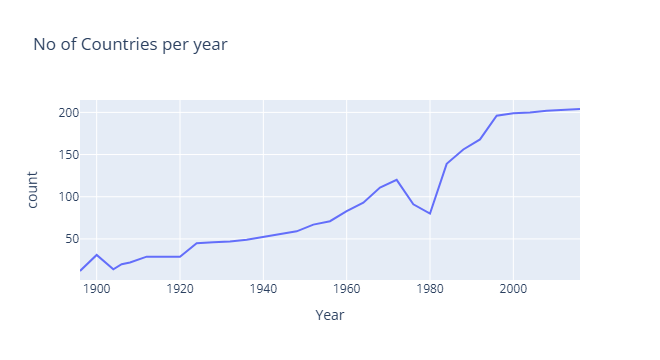

In [362]:
fig = px.line(nations_overtime, x="Year", y="count", title='No of Countries per year')
fig.show()

In [368]:
df2 = df.drop_duplicates(['Year','Event'])['Year'].value_counts().reset_index().sort_values('Year')
df2.rename(columns = {'count':'No of events'})

,Year,No of events
28,1896,43
26,1900,90
25,1904,95
27,1906,74
23,1908,109
24,1912,107
14,1920,158
20,1924,131
22,1928,122
21,1932,131


In [372]:
x = df.drop_duplicates(['Year','Sport','Event'])

In [392]:
x


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160449,97860,Lonce Gaston Quentin,M,40.0,NaN,NaN,France,FRA,1920 Summer,1920,Summer,Antwerpen,Archery,"Archery Men's Target Archery, 28 metres, Indiv...",Silver,France,NaN,0,0,1
161311,98435,Ioannis Raisis,M,NaN,NaN,NaN,Greece,GRE,1906 Summer,1906,Summer,Athina,Fencing,"Fencing Men's Sabre, Masters, Individual",Silver,Greece,NaN,0,0,1
175283,107029,Franz Xaver Schmid,M,27.0,NaN,NaN,Germany,GER,1932 Summer,1932,Summer,Los Angeles,Alpinism,Alpinism Mixed Alpinism,Gold,Germany,NaN,0,1,0
176005,107506,Hermann Schreiber,M,26.0,NaN,NaN,Switzerland,SUI,1936 Summer,1936,Summer,Berlin,Aeronautics,Aeronautics Mixed Aeronautics,Gold,Switzerland,NaN,0,1,0


<Axes: xlabel='Year', ylabel='Sport'>

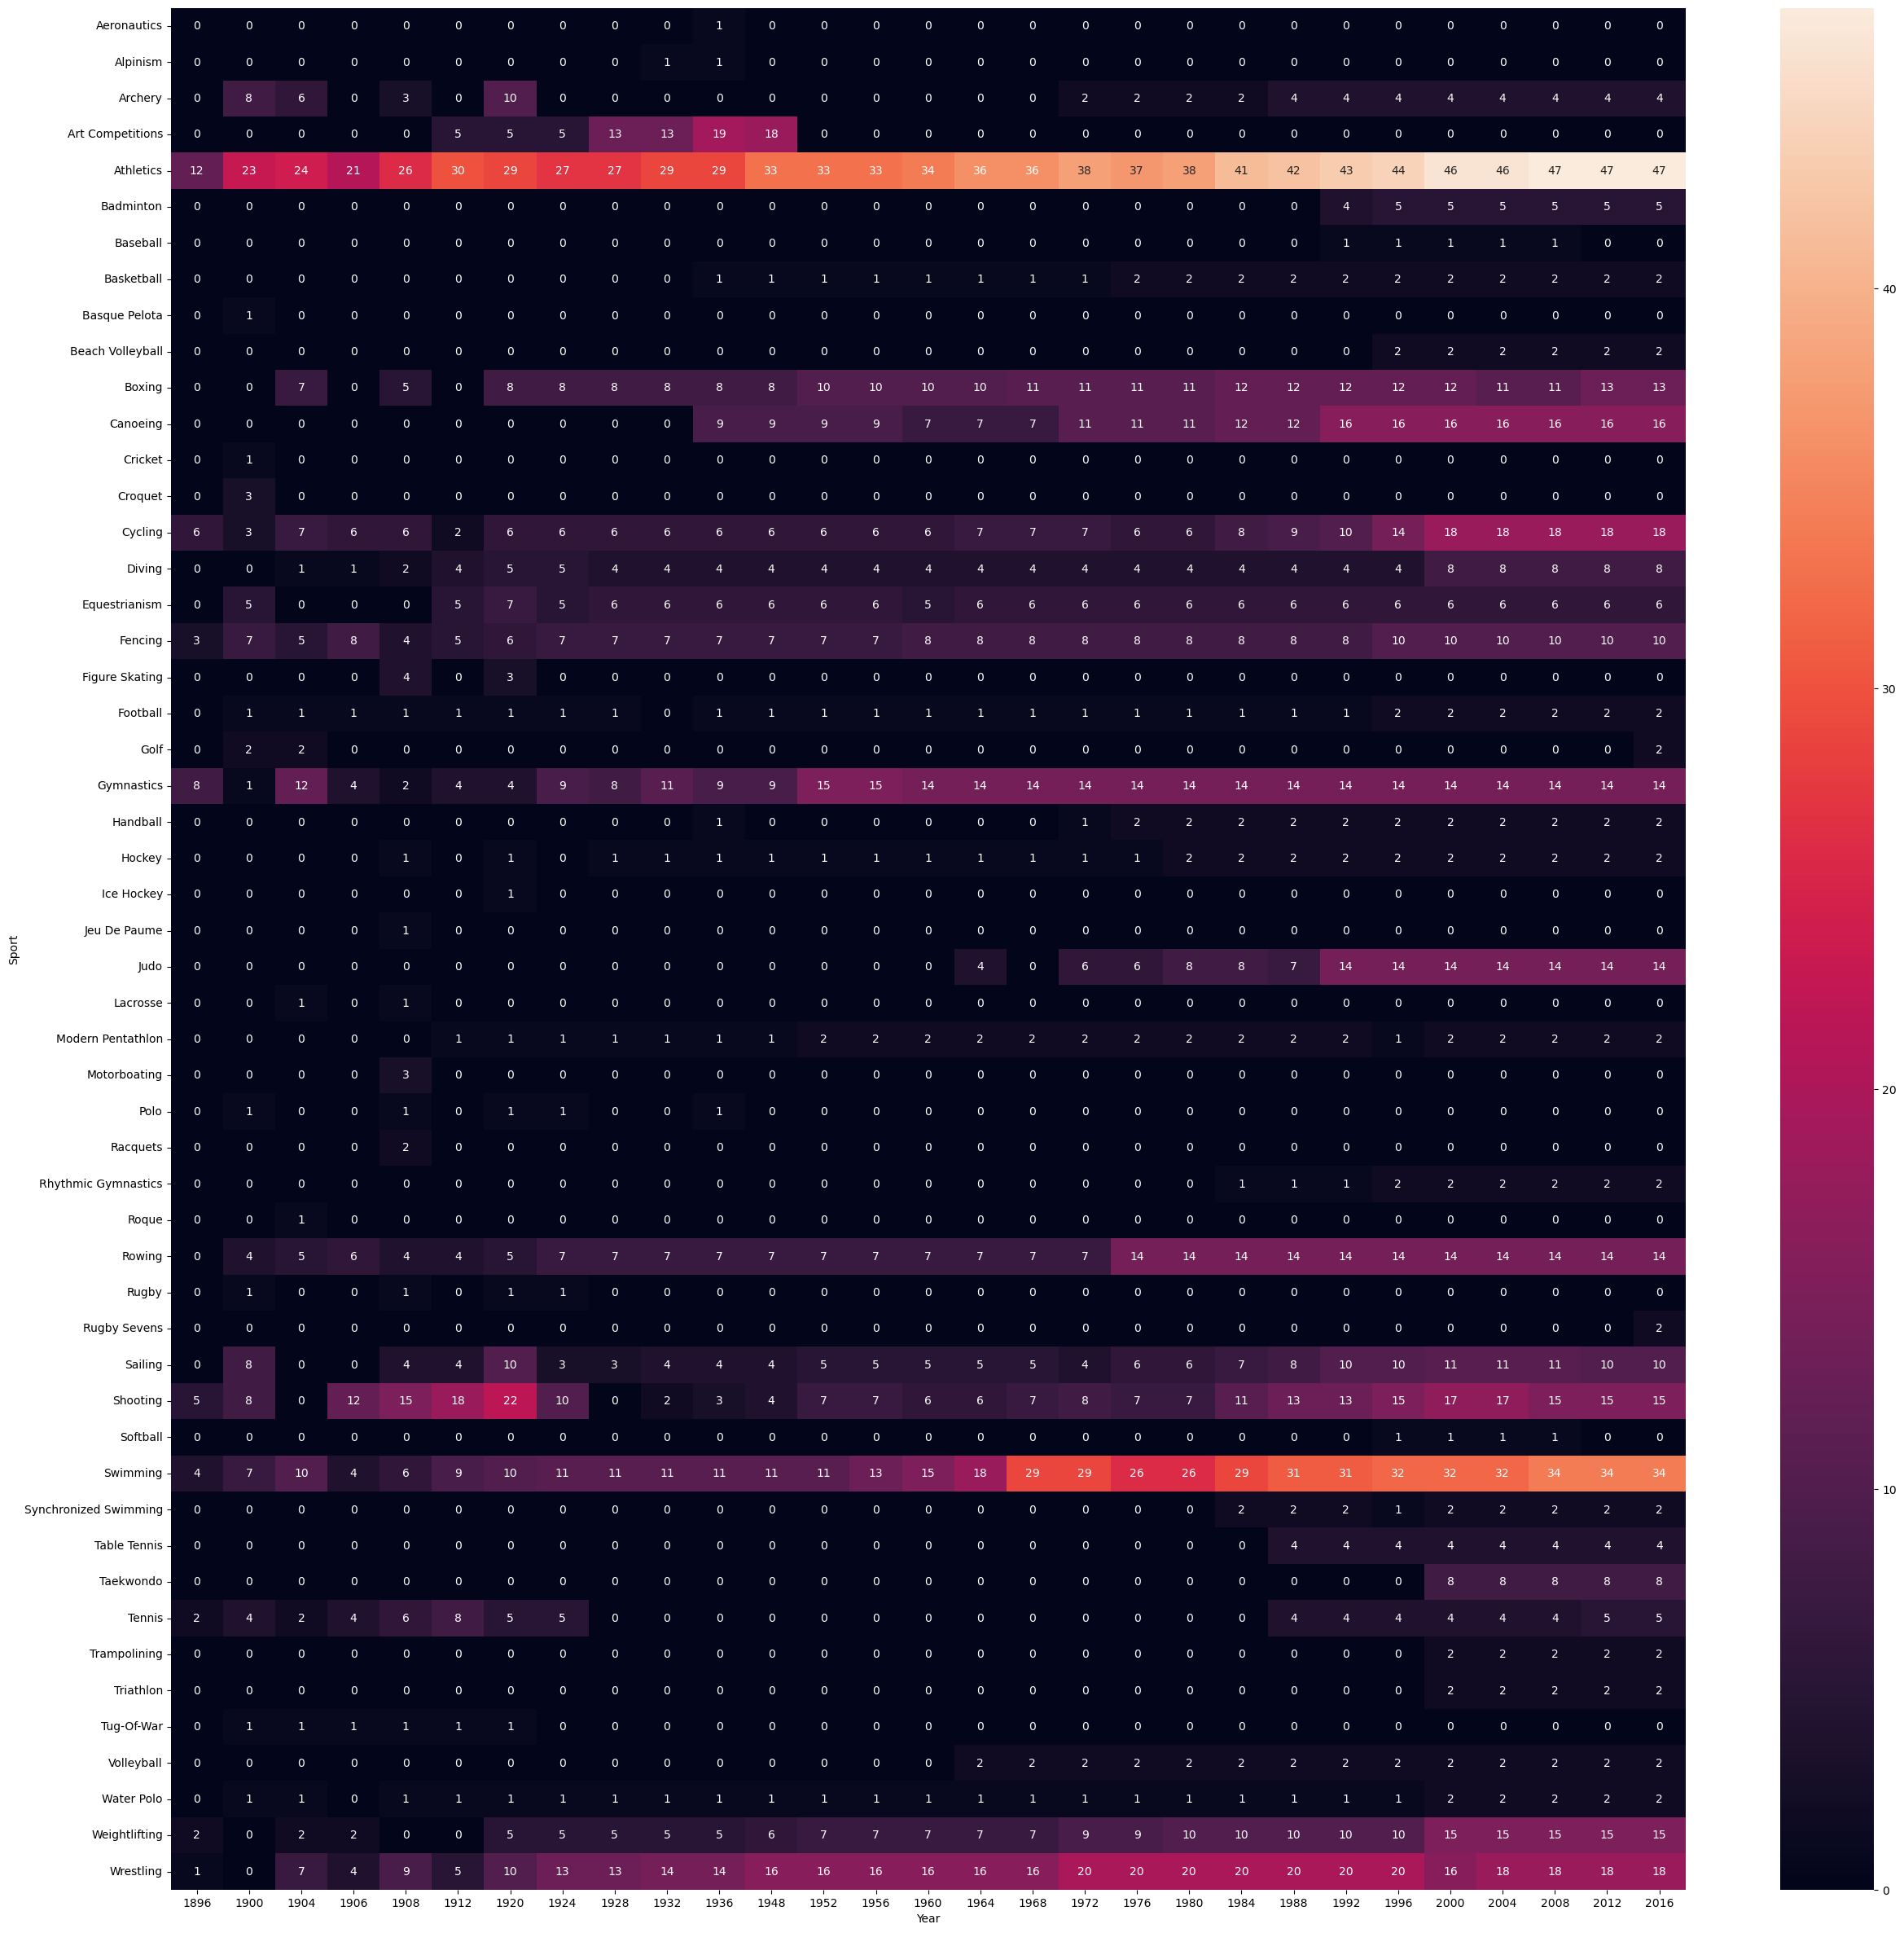

In [394]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30,30))
sns.heatmap(x.pivot_table(index='Sport',columns='Year', values='Event',aggfunc='count').fillna(0).astype('int'),annot=True)

In [396]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,0,0,0
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,0,0,0
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0


In [426]:
def most_succ(df,sport):
    temp_df = df.dropna(subset=['Medal'])

    if sport != 'Over all':
        temp_df = temp_df[temp_df['Sport'] == sport]
    
    x = temp_df['Name'].value_counts().reset_index().head(15).merge(df,left_on='Name',right_on='Name',how='left')[['Name','count','Sport','region',]].drop_duplicates(['Name'])
    x.rename(columns={'count':'No of Medals'},inplace=True)
    return x

In [430]:
most_succ(df,'Gymnastics')

,Name,No of Medals,Sport,region
0,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
19,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
43,Borys Anfiyanovych Shakhlin,13,Gymnastics,Russia
67,Takashi Ono,13,Gymnastics,Japan
100,Sawao Kato,12,Gymnastics,Japan
124,Aleksey Yuryevich Nemov,12,Gymnastics,Russia
145,Viktor Ivanovych Chukarin,11,Gymnastics,Russia
161,Vra slavsk (-Odloilov),11,Gymnastics,Czech Republic
179,gnes Keleti-Srkny (Klein),10,Gymnastics,Hungary
193,Vitaly Venediktovich Shcherbo,10,Gymnastics,Russia


In [470]:
tempdf = df.dropna(subset=['Medal']).drop_duplicates(
    subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal']
)

In [480]:
tempdf

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
12,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,NaN,1,0,0
13,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,NaN,1,0,0
15,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland,NaN,1,0,0
16,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222486,135521,Anton Zwerina,M,23.0,NaN,66.0,Austria,AUT,1924 Summer,1924,Summer,Paris,Weightlifting,Weightlifting Men's Lightweight,Silver,Austria,NaN,0,0,1
222508,135535,Claudia Antoinette Zwiers,F,22.0,181.0,78.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Judo,Judo Women's Middleweight,Bronze,Netherlands,NaN,1,0,0
222526,135553,Galina Ivanovna Zybina (-Fyodorova),F,21.0,168.0,80.0,Soviet Union,URS,1952 Summer,1952,Summer,Helsinki,Athletics,Athletics Women's Shot Put,Gold,Russia,NaN,0,1,0
222528,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver,Russia,NaN,0,0,1


In [488]:
newtempdf = tempdf[tempdf['region']=='India']
finaldf = newtempdf.groupby('Year').count()['Medal'].reset_index('Year').sort_values('Year')

In [494]:
newtempdf

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
4186,2699,Shaukat Ali,M,30.0,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4190,2703,Syed Mushtaq Ali,M,22.0,165.0,61.0,India,IND,1964 Summer,1964,Summer,Tokyo,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4461,2864,Richard James Allen,M,30.0,172.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4462,2864,Richard James Allen,M,34.0,172.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
7056,4518,"Joseph Anthony ""Joe"" Antic",M,29.0,168.0,59.0,India,IND,1960 Summer,1960,Summer,Roma,Hockey,Hockey Men's Hockey,Silver,India,NaN,0,0,1
17790,11197,Vasudevan Bhaskaran,M,29.0,174.0,68.0,India,IND,1980 Summer,1980,Summer,Moskva,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
18286,11520,Govinda Billimogaputtaswamy,M,20.0,171.0,60.0,India,IND,1972 Summer,1972,Summer,Munich,Hockey,Hockey Men's Hockey,Bronze,India,NaN,1,0,0
18444,11601,Abhinav Bindra,M,25.0,173.0,70.0,India,IND,2008 Summer,2008,Summer,Beijing,Shooting,"Shooting Men's Air Rifle, 10 metres",Gold,India,NaN,0,1,0
34630,21339,Rajendra Absolem Christy,M,30.0,165.0,58.0,India,IND,1968 Summer,1968,Summer,Mexico City,Hockey,Hockey Men's Hockey,Bronze,India,NaN,1,0,0
35545,21912,Leslie Walter Claudius,M,21.0,162.0,53.0,India,IND,1948 Summer,1948,Summer,London,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0


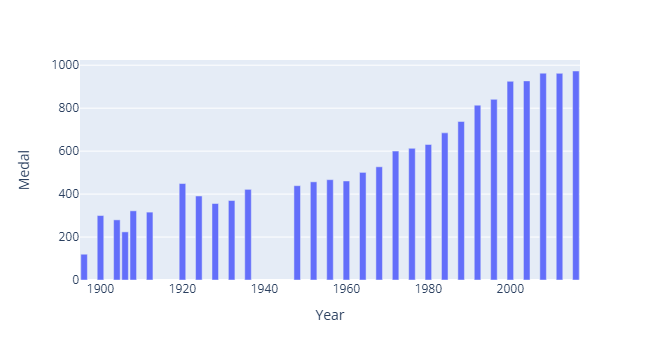

In [482]:
fig= px.bar(finaldf, x='Year', y='Medal')
fig.show()

In [484]:
def yearwise_me_tal_con(df,country):
    tempdf = df.dropna(subset=['Medal']).drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])
    newtempdf = tempdf
    if country != 'Over all':
        newtempdf = tempdf[tempdf['region']==country]
    
    finaldf = newtempdf.groupby('Year').count()['Medal'].reset_index('Year').sort_values('Year')
    fig= px.bar(finaldf, x='Year', y='Medal')
    fig.show()

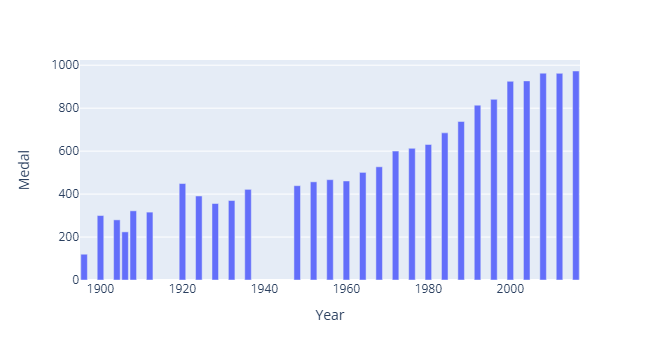

In [486]:
yearwise_me_tal_con(df,'Over all')

<Axes: xlabel='Year', ylabel='Sport'>

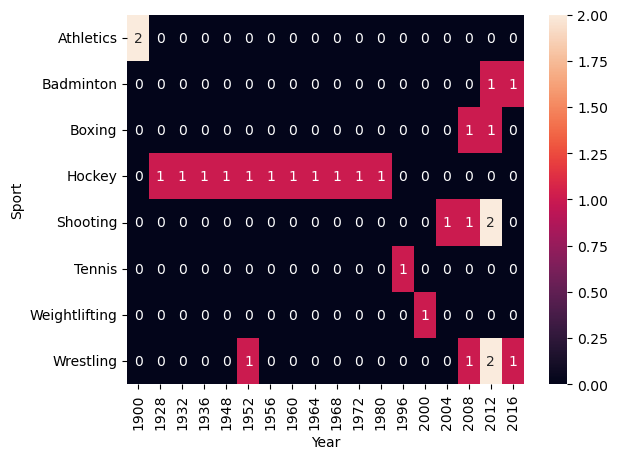

In [511]:
tempdf = df.dropna(subset=['Medal']).drop_duplicates(
    subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal']
)
newtempdf = tempdf[tempdf['region']=='India'].sort_values('Year')
sns.heatmap(newtempdf.pivot_table(index='Sport',columns='Year',values='Medal',aggfunc='count').fillna(0).astype(int),annot=True)

In [523]:
def most_succ(df,country):
    temp_df = df.dropna(subset=['Medal'])

    
    temp_df = temp_df[temp_df['region'] == country]
    
    x = temp_df['Name'].value_counts().reset_index().head(15).merge(df,left_on='Name',right_on='Name',how='left')[['Name','count','Sport']].drop_duplicates(['Name'])
    x.rename(columns={'count':'No of Medals'},inplace=True)
    return x

In [525]:
most_succ(df,'India')

,Name,No of Medals,Sport
0,Udham Singh Kular,4,Hockey
4,Leslie Walter Claudius,4,Hockey
8,Shankar Pillay Laxman,3,Hockey
11,Ranganathan Francis,3,Hockey
14,Richard James Allen,3,Hockey
17,Balbir Singh,3,Hockey
20,Harbinder Singh Chimni,3,Hockey
23,"Balbir Singh Dosanjh, Sr.",3,Hockey
26,"Victor John ""V. J."" Peter",3,Hockey
29,Dhyan Chand Bais,3,Hockey


In [527]:
import plotly.figure_factory as ff
athletedf = df.drop_duplicates(subset=['Name','region'])
x1 = athletedf['Age'].dropna()
x2 = athletedf[athletedf['Medal']== 'Gold']['Age'].dropna()
x3 = athletedf[athletedf['Medal']== 'Silver']['Age'].dropna()
x4 = athletedf[athletedf['Medal']== 'Bronze']['Age'].dropna()
fig = ff.create_distplot([x1,x2,x3,x4],['Age Distribution','Gold medalist','Silver medalist','Bronze medalist'],show_hist=False,show_rug=False)
fig.show()

In [533]:
athletedf = df.drop_duplicates(subset=['Name','region'])


In [541]:
x1 = athletedf['Age'].dropna()
x2 = athletedf[athletedf['Medal']== 'Gold']['Age'].dropna()
x3 = athletedf[athletedf['Medal']== 'Silver']['Age'].dropna()
x4 = athletedf[athletedf['Medal']== 'Bronze']['Age'].dropna()

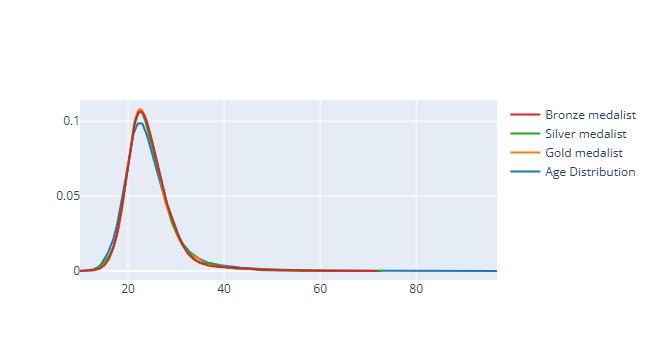

In [544]:
fig = ff.create_distplot([x1,x2,x3,x4],['Age Distribution','Gold medalist','Silver medalist','Bronze medalist'],show_hist=False,show_rug=False)
fig.show()

In [554]:
sports_list = df['Sport'].unique().tolist()

In [558]:
sports_list

['Basketball',
 'Judo',
 'Football',
 'Tug-Of-War',
 'Athletics',
 'Swimming',
 'Badminton',
 'Sailing',
 'Gymnastics',
 'Art Competitions',
 'Handball',
 'Weightlifting',
 'Wrestling',
 'Water Polo',
 'Hockey',
 'Rowing',
 'Fencing',
 'Equestrianism',
 'Shooting',
 'Boxing',
 'Taekwondo',
 'Cycling',
 'Diving',
 'Canoeing',
 'Tennis',
 'Modern Pentathlon',
 'Golf',
 'Softball',
 'Archery',
 'Volleyball',
 'Synchronized Swimming',
 'Table Tennis',
 'Baseball',
 'Rhythmic Gymnastics',
 'Rugby Sevens',
 'Trampolining',
 'Beach Volleyball',
 'Triathlon',
 'Rugby',
 'Lacrosse',
 'Polo',
 'Cricket',
 'Ice Hockey',
 'Racquets',
 'Motorboating',
 'Croquet',
 'Figure Skating',
 'Jeu De Paume',
 'Roque',
 'Basque Pelota',
 'Alpinism',
 'Aeronautics']

In [576]:
def sport_wise_age(df,sport):
    athletedf = df.drop_duplicates(subset=['Name','region'])
    tempdf = athletedf[(athletedf['Sport']== sport)]['Age'].dropna()
    tempdf1 = athletedf[(athletedf['Sport']== sport) & (athletedf['Medal']== 'Gold')]['Age'].dropna()
    tempdf2 = athletedf[(athletedf['Sport']== sport) & (athletedf['Medal']== 'Silver')]['Age'].dropna()
    tempdf3 = athletedf[(athletedf['Sport']== sport) & (athletedf['Medal']== 'Bronze')]['Age'].dropna()
    
    fig = ff.create_distplot([tempdf,tempdf1,tempdf2,tempdf3],['Age Distribution','Gold medalist','Silver medalist','Bronze medalist'],show_hist=False,show_rug=False)
    fig.show()
    

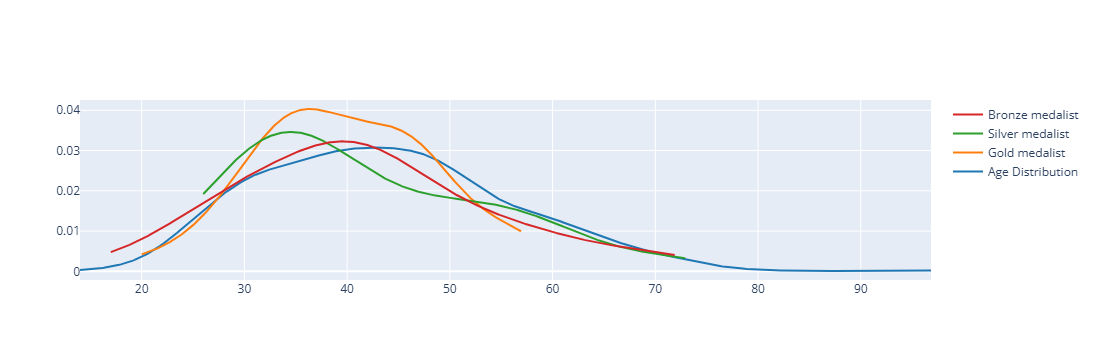

In [578]:
sport_wise_age(df,'Art Competitions')

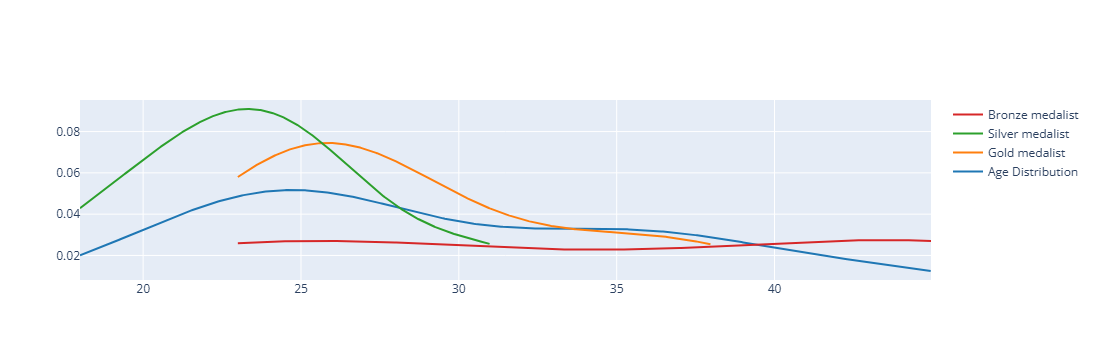

In [580]:
sport_wise_age(df,'Figure Skating')

In [618]:
 athletedf['Medal'].fillna('No Medal',inplace=True)

In [606]:
tempdf = athletedf[athletedf['Sport']=='Athletics']


<Axes: xlabel='Weight', ylabel='Height'>

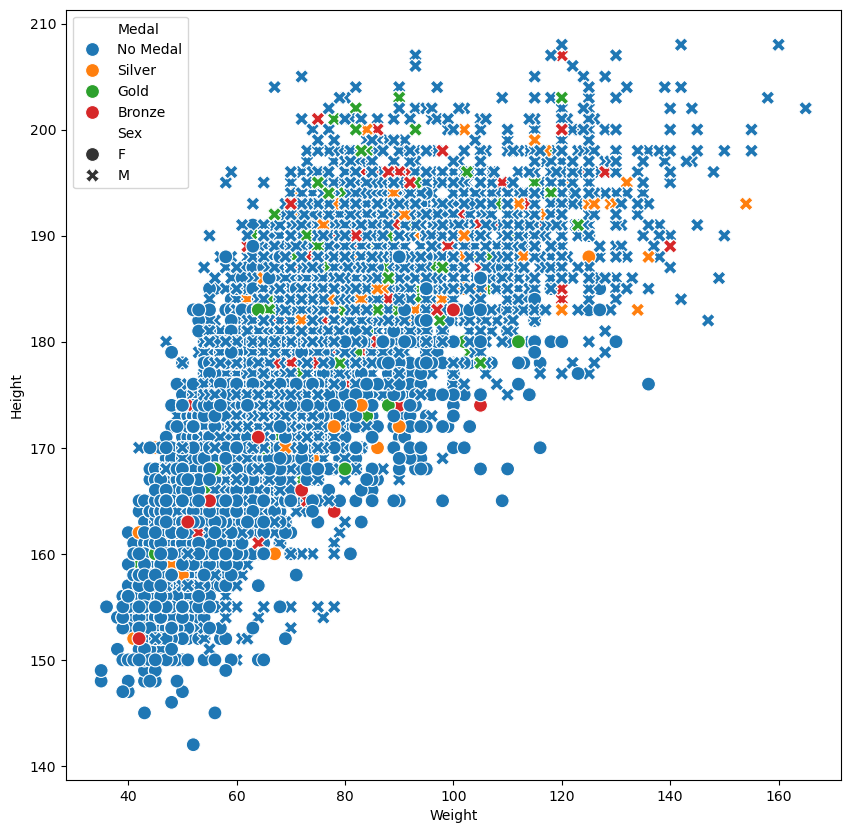

In [616]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=tempdf['Weight'], y=tempdf['Height'],hue=tempdf['Medal'],style=tempdf['Sex'],s=100)


In [636]:
def athlete_size_sex (df,sport):
    athletedf = df.drop_duplicates(subset=['Name','region'])
    athletedf['Medal'] = athletedf['Medal'].fillna('No Medal')
    tempdf = athletedf[athletedf['Sport']=='Athletics']
    plt.figure(figsize=(10,10))
    sns.scatterplot(x=tempdf['Weight'], y=tempdf['Height'],hue=tempdf['Medal'],style=tempdf['Sex'],s=100)


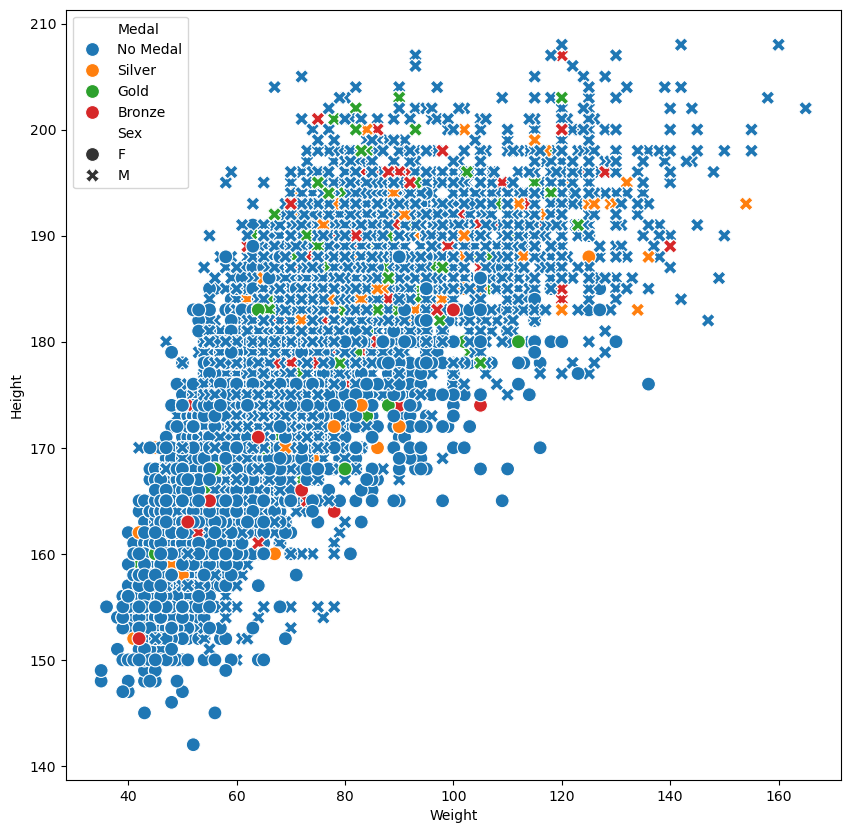

In [638]:
athlete_size_sex (df,'Athletics')

In [664]:
 men = athletedf[athletedf['Sex']=='M'].groupby('Year').count()['Name'].reset_index('Year').rename(columns={'Name':'Athletes'})
women = athletedf[athletedf['Sex']=='F'].groupby('Year').count()['Name'].reset_index('Year').rename(columns={'Name':'Athletes'})

In [666]:
final = men.merge(women,on='Year')

In [674]:
final.rename(columns={'Athletes_x':'Men','Athletes_y':'Women'},inplace = True)

In [676]:
final

,Year,Men,Women
0,1900,1181,23
1,1904,629,6
2,1906,759,6
3,1908,1772,44
4,1912,1978,53
5,1920,2280,73
6,1924,2535,132
7,1928,2342,285
8,1932,1382,162
9,1936,3539,316


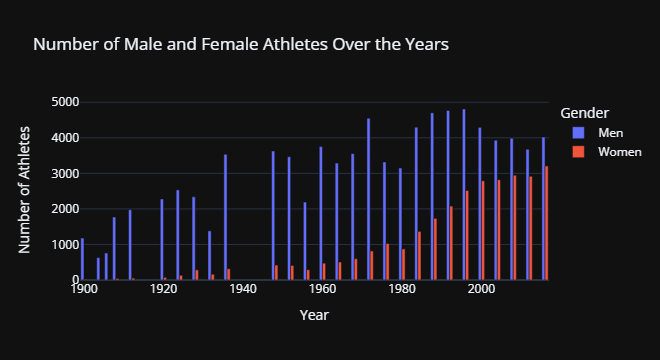

In [678]:
data = {
    'Year': [1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948, 1952, 1956,
             1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008,
             2012, 2016],
    'Men': [1181, 629, 759, 1772, 1978, 2280, 2535, 2342, 1382, 3539, 3629, 3468, 2193,
            3755, 3290, 3555, 4552, 3320, 3151, 4299, 4704, 4769, 4811, 4294, 3931, 3990,
            3679, 4022],
    'Women': [23, 6, 6, 44, 53, 73, 132, 285, 162, 316, 420, 409, 288, 473, 507, 599,
              818, 1028, 875, 1368, 1734, 2080, 2518, 2790, 2820, 2947, 2919, 3209]
}

df_gender = pd.DataFrame(data)

# Convert to long format for grouped bar chart
df_long = df_gender.melt(id_vars='Year', value_vars=['Men', 'Women'], 
                         var_name='Gender', value_name='Count')

# Plot using Plotly
fig = px.bar(df_long, x='Year', y='Count', color='Gender', 
             barmode='group', title='Number of Male and Female Athletes Over the Years')

fig.update_layout(template='plotly_dark', xaxis_title='Year', yaxis_title='Number of Athletes')
fig.show()

In [680]:
df_gender

,Year,Men,Women
0,1900,1181,23
1,1904,629,6
2,1906,759,6
3,1908,1772,44
4,1912,1978,53
5,1920,2280,73
6,1924,2535,132
7,1928,2342,285
8,1932,1382,162
9,1936,3539,316
